# 1. Import Packages

In [76]:
# Data Structure
import numpy as np
import pandas as pd
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# Statistical Analysis
from scipy import stats

In this notebook a short descripitive analysis of the stroke dataset is provided. 

# 2. Data Collection

## 2.1 Load Dataset

In [77]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [78]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 2. Data Preprocessing

## 2.1 Drop Columns

In [79]:
# drop id because it is not relevant for the prediction
df.drop(['id'], axis=1, inplace=True)

## 2.2 Handle Missing Data

In [80]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [81]:
# drop rows with NaN
df.dropna(inplace = True)

In [82]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

201 rows were dropped due to missing values. 40 of the omitted rows were from stroke = 1 and 161 from stroke = 0.

In [83]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

No missing data anymore

## 2.3 Check Data Formats

In [84]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**201** columns were dropped

# 3 Descriptive Analysis

## 3.1 Dataset in General

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [86]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 3.2 Feature Analysis

### Age

In [87]:
df.groupby('stroke')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4700.0,41.760451,22.268129,0.08,24.0,43.0,59.0,82.0
1,209.0,67.712919,12.402848,14.00,58.0,70.0,78.0,82.0


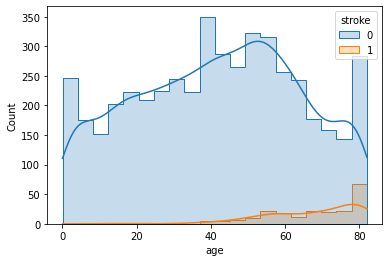

In [88]:
sns.histplot(data=df, x="age", hue="stroke", element="step", kde=True)
plt.show()

In [89]:
stroke = df.loc[df['stroke']== 1]
no_stroke = df.loc[df['stroke']== 0]

In [90]:
# independent t-test
stats.ttest_ind(stroke['age'], no_stroke['age'])

Ttest_indResult(statistic=16.73263034694362, pvalue=3.6556933219806625e-61)

In line with the results from the explanations of LIME and SHAP the age differs significantly between the 'stroke' and 'no stroke' class. This indicates a possible relationship and therefore a value that could be used for prediction

### Hypertension

In [91]:
df.groupby('stroke')['hypertension'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4700.0,0.083191,0.276201,0.0,0.0,0.0,0.0,1.0
1,209.0,0.287081,0.453486,0.0,0.0,0.0,1.0,1.0


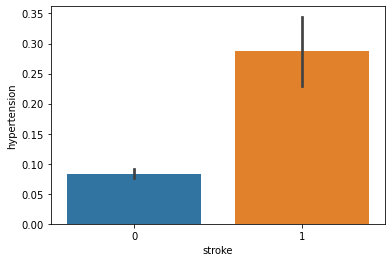

In [92]:
sns.barplot(x="stroke", y="hypertension", data=df)
plt.show()

In [93]:
# independent t-test
stats.ttest_ind(stroke['hypertension'], no_stroke['hypertension'])

Ttest_indResult(statistic=10.086097430680306, pvalue=1.0816791323337411e-23)

### Body Mass Index (BMI)

In [94]:
df.groupby('stroke')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4700.0,28.823064,7.908287,10.3,23.4,28.0,33.1,97.6
1,209.0,30.471292,6.329452,16.9,26.4,29.7,33.7,56.6


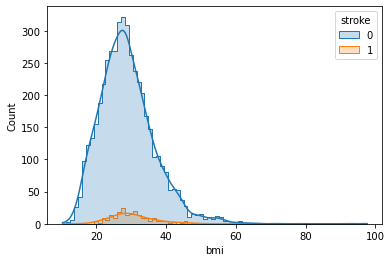

In [95]:
sns.histplot(data=df, x="bmi", hue="stroke", element="step", kde=True)
plt.show()

In [96]:
# independent t-test
stats.ttest_ind(stroke['bmi'], no_stroke['bmi'])

Ttest_indResult(statistic=2.9709426097788083, pvalue=0.0029832690997420824)

## 3.2 Correlation between features

In [100]:
df_dummies = pd.get_dummies(df)

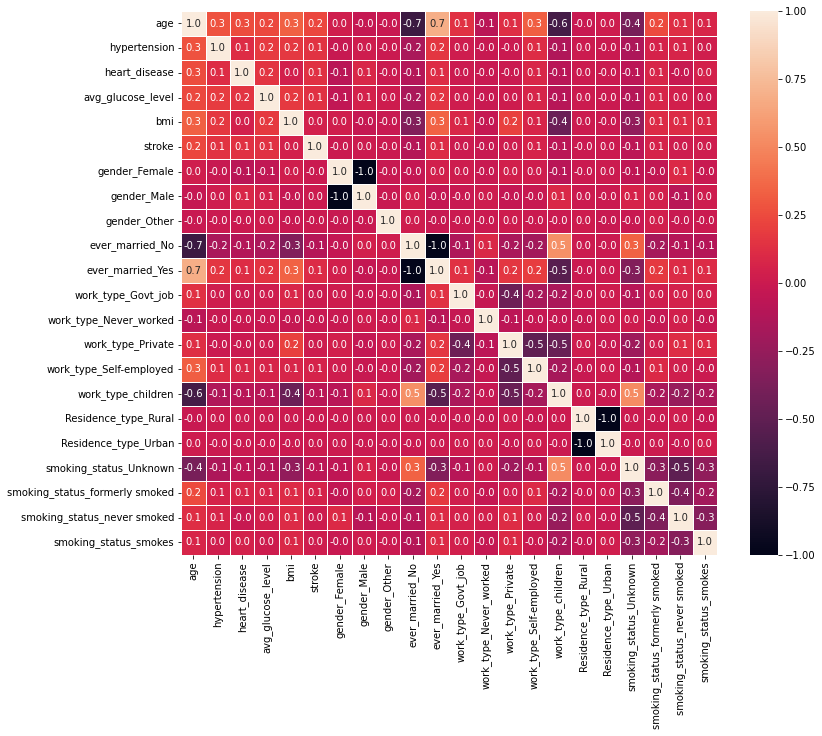

In [103]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df_dummies.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)
plt.show()